In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

In [72]:
df = pd.read_csv('./csv/gp_ts/gp_ts.csv')
df

,f_sigma,f_max,noise,alpha,beta,seed,play_time,select_arm,reward
0,0.3,0.6,0.05,0.05,0.05,1,0,0.968262,0
1,0.3,0.6,0.05,0.05,0.05,1,1,0.233666,0
2,0.3,0.6,0.05,0.05,0.05,1,2,0.754891,0
3,0.3,0.6,0.05,0.05,0.05,1,3,0.505742,0
4,0.3,0.6,0.05,0.05,0.05,1,4,0.328361,0
...,...,...,...,...,...,...,...,...,...
388795,0.2,0.4,0.30,0.30,0.30,6,295,0.623571,0
388796,0.2,0.4,0.30,0.30,0.30,6,296,0.395896,0
388797,0.2,0.4,0.30,0.30,0.30,6,297,0.357317,0
388798,0.2,0.4,0.30,0.30,0.30,6,298,0.319398,0


In [73]:
f_df = df[(df['noise'] == 0.05) & (df['beta'] == 0.05) &  (df['alpha'] == 0.15) &  (df['seed'] == 1)]

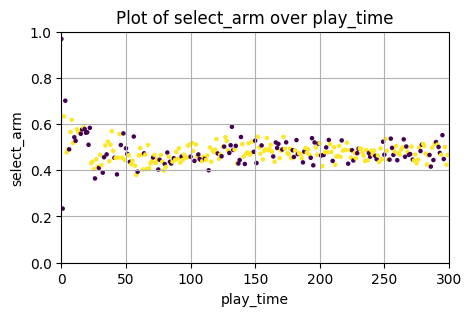

In [74]:
plt.figure(figsize=(5,3))
plt.scatter(r_df['play_time'], r_df['select_arm'], s=5, c=r_df['reward'])
plt.xlabel('play_time')
plt.ylabel('select_arm')
plt.title('Plot of select_arm over play_time')  
plt.xlim(0,len(r_df['play_time']))
plt.ylim(0,1)
plt.grid()
plt.show()

In [75]:
# 0.3	0.6	0.05	0.15	0.15	
df = pd.read_csv('./csv/gp_ts/gp_ts.csv')
f_max = 0.6
f_sigma = 0.3
df = df[(df['f_max'] == f_max) & (df['f_sigma'] == f_sigma)]
f_df = df[(df['noise'] == 0.05) & (df['beta'] == 0.15) &  (df['alpha'] == 0.15)]
f_df

,f_sigma,f_max,noise,alpha,beta,seed,play_time,select_arm,reward
4200,0.3,0.6,0.05,0.15,0.15,1,0,0.968262,0
4201,0.3,0.6,0.05,0.15,0.15,1,1,0.233666,0
4202,0.3,0.6,0.05,0.15,0.15,1,2,0.632616,1
4203,0.3,0.6,0.05,0.15,0.15,1,3,0.700726,0
4204,0.3,0.6,0.05,0.15,0.15,1,4,0.489565,1
...,...,...,...,...,...,...,...,...,...
69295,0.3,0.6,0.05,0.15,0.15,2,295,0.498663,1
69296,0.3,0.6,0.05,0.15,0.15,2,296,0.516267,1
69297,0.3,0.6,0.05,0.15,0.15,2,297,0.488096,1
69298,0.3,0.6,0.05,0.15,0.15,2,298,0.503129,1


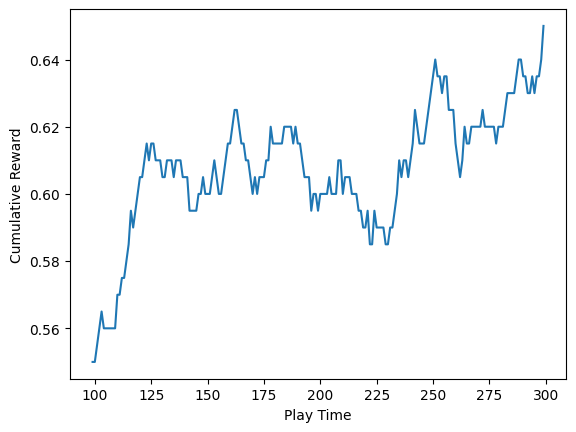

In [79]:
# 合計報酬の計算
f_df = f_df.groupby('play_time').mean()
cumulative_reward = f_df['reward'].rolling(window=100).mean()

le = [i for i in range(300)]
# プロットの作成
plt.plot(le, cumulative_reward)
plt.xlabel('Play Time')
plt.ylabel('Cumulative Reward')
plt.show()

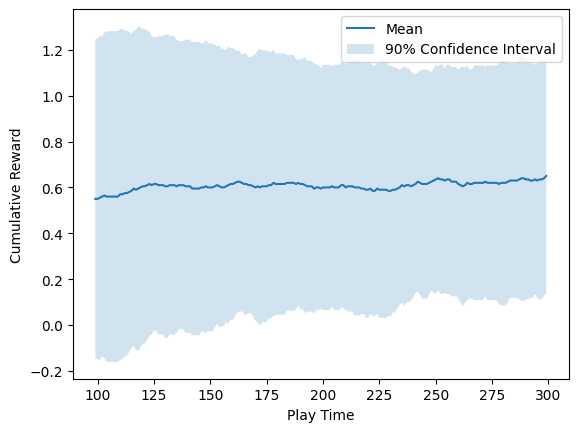

In [67]:
import numpy as np

f_df = f_df.groupby('play_time').agg({'reward': ['mean', 'var']})
cumulative_reward_mean = f_df['reward', 'mean'].rolling(window=100).mean()
cumulative_reward_std = np.sqrt(f_df['reward', 'var']).rolling(window=100).mean()
le = [i for i in range(300)]

# 90%信頼区間の計算
confidence_interval_lower = cumulative_reward_mean - 1.645 * cumulative_reward_std
confidence_interval_upper = cumulative_reward_mean + 1.645 * cumulative_reward_std

# プロットの作成
plt.plot(le, cumulative_reward_mean, label='Mean')
plt.fill_between(le, confidence_interval_lower, confidence_interval_upper, alpha=0.2, label='90% Confidence Interval')
plt.xlabel('Play Time')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()
